<a href="https://colab.research.google.com/github/Behnaz81/MachineLearningDaily/blob/main/day02_iris_classification/MachineLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Day 2

In [41]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

I will work with **iris** dataset in this mini-project.

In [13]:
iris = sk.datasets.load_iris(as_frame=True)
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


To get a review of the dataset here we used **info** and **describe** methods of pandas library.

Here we can see that there are 150 entries in the dataset and all of them are float and no null value exists.

In [22]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Also here we can see the mathematical description of the dataset.

In [20]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visulization

Here I visualized the dataset using boxplot to see if we have any outliers. As we can see here there are no outliers in this dataset.

<Axes: >

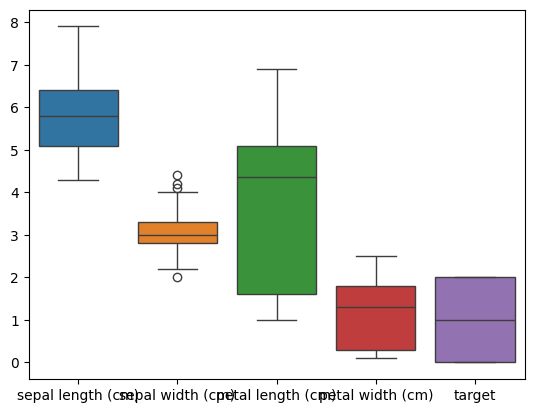

In [21]:
sns.boxplot(data=data1)

This is the pairplot. It's a data visualization tool that displays pairwise relationships between variables in a dataset.

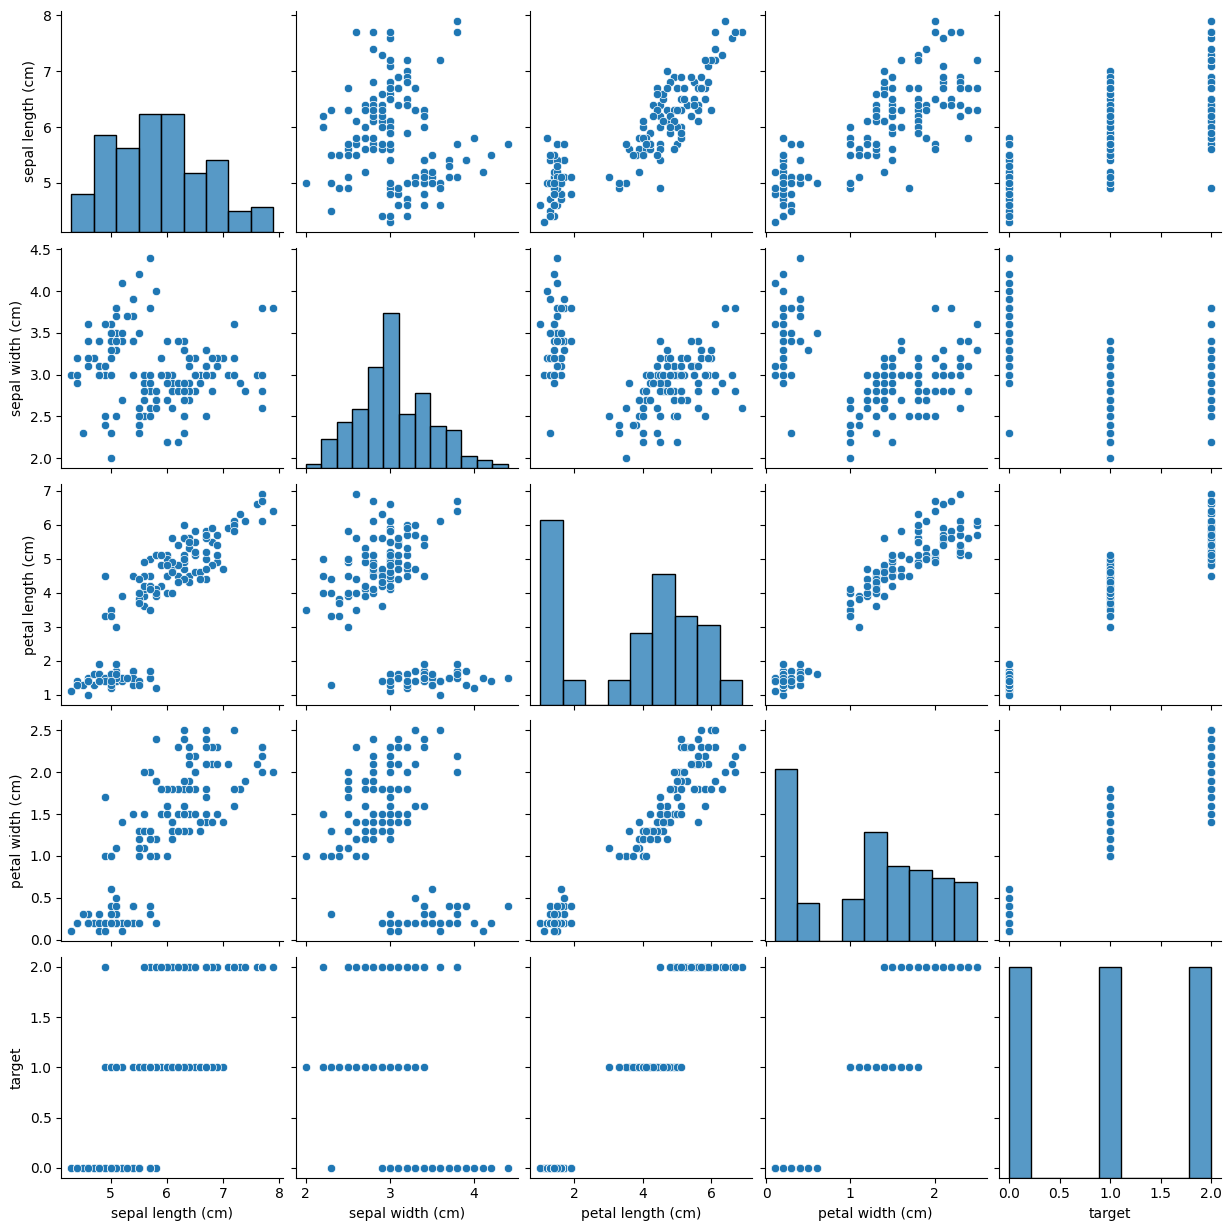

In [17]:
sns.pairplot(data1)

This is a pairplot too but here we can see the different kinds of targets. Using this classifying different classes is much easier.

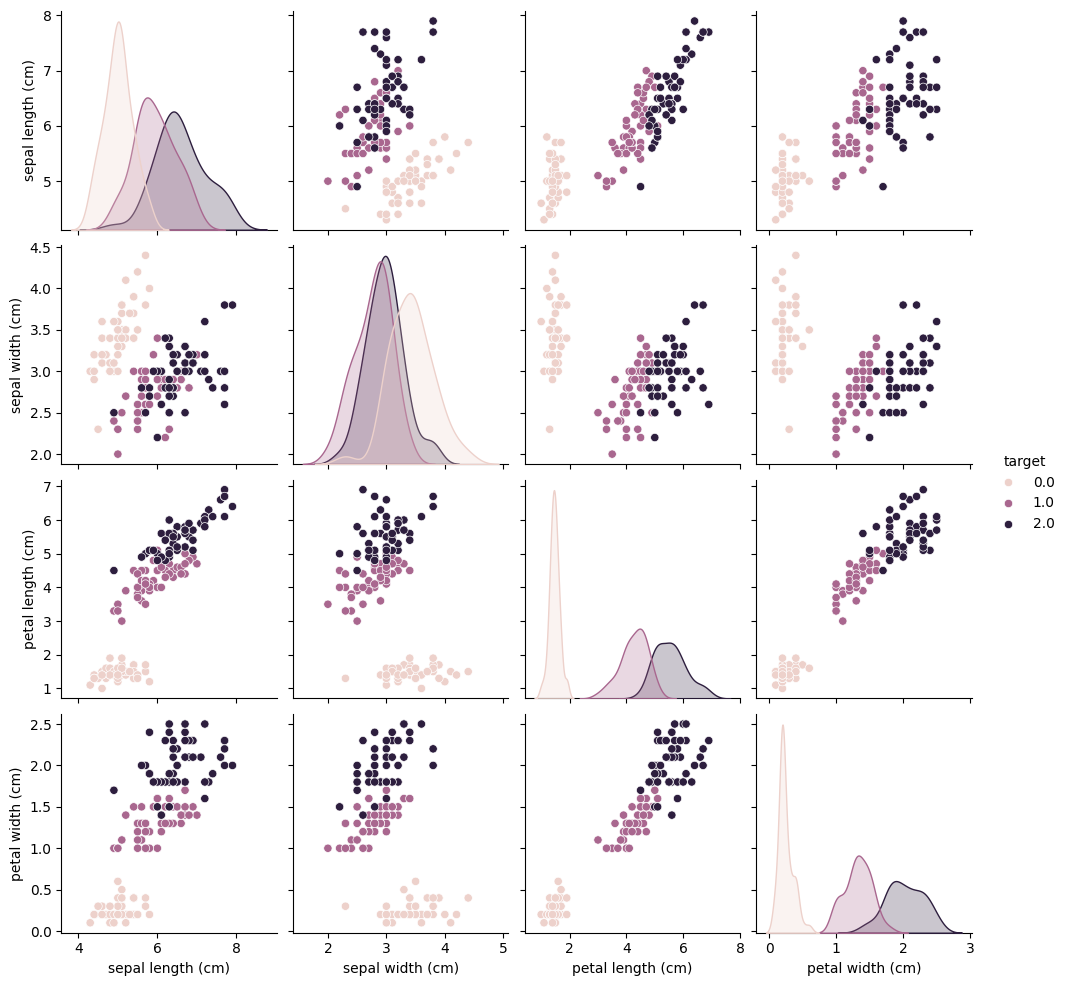

In [16]:
sns.pairplot(data1, hue='target')

## Splitting and Standardization

Because KNN and logistic regression are sensible to data we should scale our features.

In [26]:
X = data1.drop("target", axis=1)
y = data1["target"]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2)

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Algorithm

KNN, or K-Nearest Neighbors, works well in situations where:
- data is relatively simple
- non-linear
- and the number of features is low.

It's particularly useful for tasks like classification and regression when a high level of accuracy is needed without the need for a complex, human-interpretable model.

So here in this dataset KNN can be a good and useful algorithm because we don't have a high dimentionality or large dataset.

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

We can see the score is 1 which means the algorithm is working very well.

Accuracy score = (TP + TN) / (TP + TN + FP + FN)

In [44]:
accuracy_score(y_test, y_pred)

1.0

Precision = TP / TP+FP

Recall = TP / TP+FN

F1 score = (precision * recall) / (precision + recall)

In [54]:
print(sk.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



A confusion matrix is a table that helps assess the performance of a classification model by comparing its predictions to the actual, true values.

<Axes: >

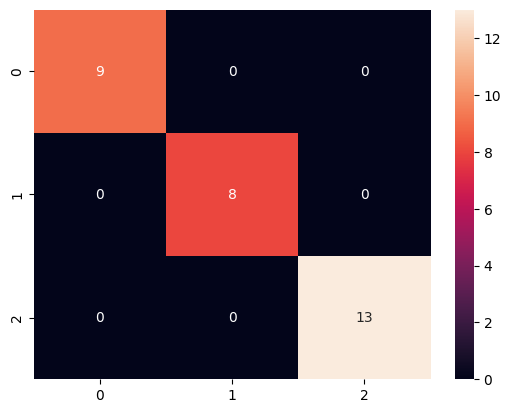

In [46]:
cf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

Here we can see that using k=2 gives us a lower accuracy in compare with other values.

<Axes: >

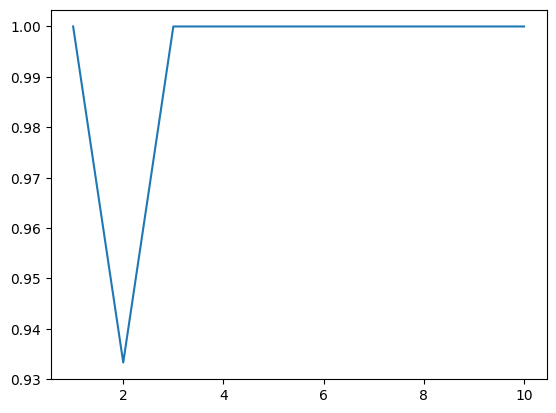

In [53]:
acc = []
for i in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  acc.append(accuracy_score(y_test, y_pred))
sns.lineplot(x=list(range(1,11)), y=acc)

## Logistic Regression

Logistic Regression is a statistical approach used in binary classification, forecasting the likelihood of a binary result depending on independent variables.

The choice between Logistic Regression and K Nearest Neighbors (KNN) hinges on data characteristics and task requirements. Logistic Regression is suitable for linear relationships, offering interpretability crucial in fields like finance or medicine, especially when the decision boundary is clear. Conversely, KNN excels with diverse, non-linear data, adapting well to changing patterns and dynamic datasets due to its simplicity and real-time adaptability.

In [48]:
logr = linear_model.LogisticRegression()
logr.fit(X_train_scaled,y_train)
y_pred = logr.predict(X_test_scaled)

As we can see here logistic regression worked well on this dataset too due to small dataset and low dimentionality.

In [49]:
accuracy_score(y_test, y_pred)

1.0

In [55]:
print(sk.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

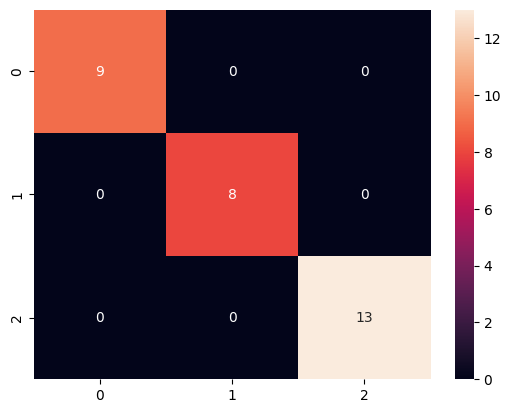

In [51]:
cf_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)